<h1> Tidy Tuesdays 1 </h1>
<h3> 2020 Covid-19 Cases </h3>

Made by : Azriel Matthew O. Ortega

In [153]:
# Data analysis and data preparation
import pandas as pd
import numpy as np
import random as rnd

# Data visualization
import seaborn as sns
import matplotlib as plt
%matplotlib inline

<h2>DATA CLEANING</h2>

In [154]:
covid = pd.read_csv('covid_19_data.csv')

#check if data set is successfully transfered
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [155]:
#check how many datas are there
covid.shape

(236017, 8)

In [156]:
#check all columns
covid.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [157]:
#check for null values
covid.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     62045
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [158]:
#drop uneccessary columns
to_drop =['Province/State', 'Last Update']

covid_new = covid.drop(to_drop, axis = 1)

covid_new.head()


,SNo,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,1,0,0
1,2,01/22/2020,Mainland China,14,0,0
2,3,01/22/2020,Mainland China,6,0,0
3,4,01/22/2020,Mainland China,1,0,0
4,5,01/22/2020,Mainland China,0,0,0


In [159]:
#check all data types
col1 = covid_new['SNo'].dtype
col2 = covid_new['ObservationDate'].dtype
col3 = covid_new['Country/Region'].dtype
col4 = covid_new['Confirmed'].dtype
col5 = covid_new['Deaths'].dtype
col6 = covid_new['Recovered'].dtype

print(col1)
print(col2)
print(col3)
print(col4)
print(col5)
print(col6)

int64
object
object
int64
int64
int64


In [160]:
#remove negative values in confirmed, deaths and recovered columns
test = covid_new

print(test.shape)

test = test.loc[test['Confirmed'] >= 0]
test = test.loc[test['Deaths'] >= 0]
test = test.loc[test['Recovered'] >= 0]

print(test.head(20))
covid_new = test

(236017, 6)
    SNo ObservationDate  Country/Region  Confirmed  Deaths  Recovered
0     1      01/22/2020  Mainland China          1       0          0
1     2      01/22/2020  Mainland China         14       0          0
2     3      01/22/2020  Mainland China          6       0          0
3     4      01/22/2020  Mainland China          1       0          0
4     5      01/22/2020  Mainland China          0       0          0
5     6      01/22/2020  Mainland China         26       0          0
6     7      01/22/2020  Mainland China          2       0          0
7     8      01/22/2020  Mainland China          1       0          0
8     9      01/22/2020  Mainland China          4       0          0
9    10      01/22/2020  Mainland China          1       0          0
10   11      01/22/2020  Mainland China          0       0          0
11   12      01/22/2020  Mainland China          5       0          0
12   13      01/22/2020       Hong Kong          0       0          0
13   14 

In [161]:
#check for duplicated data

duplicate = test[test.duplicated()]
print(duplicate)

#since dataframe is empty, no need to delete duplicated data

Empty DataFrame
Columns: [SNo, ObservationDate, Country/Region, Confirmed, Deaths, Recovered]
Index: []


<h2>DATA ANALYSIS</h2>

Below is a table showing the total number of active cases recorded in the country ever since from the starting date where the virus is seen and the last date where the virus is seen. As we read the data we can see that each country has an upward trend in their covid cases. Some countries/regions have an exponential trend with there total number of confirmed cases.

In [162]:
#get all records of confirmed cases of the countries

dump = covid_new.groupby(['Country/Region','ObservationDate']).Confirmed.sum()
print(dump.shape)
print(dump[50000:50020])

(69085,)
Country/Region  ObservationDate
Portugal        01/07/2021         456533
                01/08/2021         466709
                01/09/2021         476187
                01/10/2021         483689
                01/11/2021         489293
                01/12/2021         496552
                01/13/2021         507108
                01/14/2021         517806
                01/15/2021         528469
                01/16/2021         539416
                01/17/2021         549801
                01/18/2021         556503
                01/19/2021         566958
                01/20/2021         581605
                01/21/2021         595149
                01/22/2021         609136
                01/23/2021         624469
                01/24/2021         636190
                01/25/2021         643113
                01/26/2021         653878
Name: Confirmed, dtype: int64


Below is also the table for the total number of deaths and total number of recovered people in each country.

In [163]:
#get all records of death cases of the countries

dump = covid_new.groupby(['Country/Region','ObservationDate']).Deaths.sum()
print(dump.shape)
print(dump[50000:50020])

(69085,)
Country/Region  ObservationDate
Portugal        01/07/2021          7472
                01/08/2021          7590
                01/09/2021          7701
                01/10/2021          7803
                01/11/2021          7925
                01/12/2021          8080
                01/13/2021          8236
                01/14/2021          8384
                01/15/2021          8543
                01/16/2021          8709
                01/17/2021          8861
                01/18/2021          9028
                01/19/2021          9246
                01/20/2021          9465
                01/21/2021          9686
                01/22/2021          9920
                01/23/2021         10194
                01/24/2021         10469
                01/25/2021         10721
                01/26/2021         11012
Name: Deaths, dtype: int64


In [164]:
#get all records of recovered cases of the countries

dump = covid_new.groupby(['Country/Region','ObservationDate']).Recovered.sum()
print(dump.shape)
print(dump.head(20))

(69085,)
Country/Region   ObservationDate
 Azerbaijan      02/28/2020             0
('St. Martin',)  03/10/2020             0
Afghanistan      01/01/2021         41727
                 01/02/2021         41727
                 01/03/2021         41727
                 01/04/2021         42530
                 01/05/2021         42666
                 01/06/2021         42666
                 01/07/2021         43291
                 01/08/2021         43440
                 01/09/2021         43740
                 01/10/2021         43948
                 01/11/2021         44137
                 01/12/2021         44608
                 01/13/2021         44850
                 01/14/2021         45298
                 01/15/2021         45434
                 01/16/2021         45465
                 01/17/2021         45868
                 01/18/2021         46359
Name: Recovered, dtype: int64


In [191]:
#get all records of active cases of the countries
active = covid_new['Confirmed'] - (covid_new['Deaths'] + covid_new['Recovered'])

#insert active cases
#covid_new.insert(3, "Active", active, True)
covid_new = covid_new.loc[:,~covid_new.columns.duplicated()] #remove duplicated columns when inserting
print(covid_new.head())

dump = covid_new.groupby(['Country/Region','ObservationDate']).Active.sum()
print(dump.shape)
print(dump.head(20))

   SNo ObservationDate  Country/Region  Active  Confirmed  Deaths  Recovered
0    1      01/22/2020  Mainland China       1          1       0          0
1    2      01/22/2020  Mainland China      14         14       0          0
2    3      01/22/2020  Mainland China       6          6       0          0
3    4      01/22/2020  Mainland China       1          1       0          0
4    5      01/22/2020  Mainland China       0          0       0          0
(69085,)
Country/Region   ObservationDate
 Azerbaijan      02/28/2020            1
('St. Martin',)  03/10/2020            2
Afghanistan      01/01/2021         7608
                 01/02/2021         7608
                 01/03/2021         7608
                 01/04/2021         8244
                 01/05/2021         8195
                 01/06/2021         8195
                 01/07/2021         7663
                 01/08/2021         7635
                 01/09/2021         7396
                 01/10/2021         7264
    

In [209]:
#get the latest data and get its current active cases

latest = covid_new.sort_values(by="ObservationDate").drop_duplicates(subset=['Country/Region'], keep ="last")
latest = latest.groupby(['Country/Region','ObservationDate']).Active.sum()
print(latest.tail(20))

Country/Region                  ObservationDate
Togo                            12/31/2020           172
Trinidad and Tobago             12/31/2020           373
Tunisia                         12/31/2020         29100
Turkey                          12/31/2020         87121
UK                              12/31/2020           795
US                              12/31/2020           100
Uganda                          12/31/2020         23232
Ukraine                         12/31/2020          4425
United Arab Emirates            12/31/2020         22711
Uruguay                         12/31/2020          5470
Uzbekistan                      12/31/2020          1503
Vanuatu                         12/31/2020             0
Vatican City                    03/09/2020             1
Venezuela                       12/31/2020          4947
Vietnam                         12/31/2020           105
West Bank and Gaza              12/31/2020         19421
Yemen                           12/31/20

Based on the data, there are some countries that have managed to recover and reduced the new active cases found today. Countries such as Australia have recovered and have no more active cases in their country. Howerver not every country is lucky, countries such as Philippines still have an upward trend with their confirmed cases found in their country.

<h2>DATA VISUALIZATION</h2>

In [350]:
# Data visualization
import seaborn as sns
import matplotlib as plt

latest = covid_new.sort_values(by="ObservationDate").drop_duplicates(subset=['Country/Region'], keep ="last")

print(latest.head)

latest = test1

#get active column                                                  
#active = latest.groupby(['Country/Region']).Active.sum()
active = active.to_frame()
active = active['Active']
print(active)

#get country/region column
test = covid_new.sort_values(by = 'Country/Region')
country = test['Country/Region'].unique()

data = pd.DataFrame(country)
#data.insert(2, "Active", active, True)
#print(data.columns)
#get country/region column

ValueError: not enough values to unpack (expected 2, got 0)

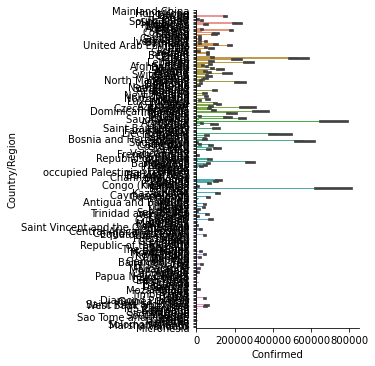

Index(['Active'], dtype='object')